### Prediction using LSTM an RNN architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import glob
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
# Import CSV files
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')

['G:\\Dev Portfolio\\Data Analysis\\Time Series Analysis on S&P 500 Stock Market Data\\individual_stocks_5yr']

In [3]:
# get the current working directory
cwd = os.getcwd()

# define the path to the csv file
csv_path = os.path.join(cwd, 'individual_stocks_5yr', 'AAPL_data.csv')

# read the csv file into a pandas dataframe
df = pd.read_csv(csv_path)
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df['date'] = pd.to_datetime(df['date'],)
df['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, Length: 1259, dtype: datetime64[ns]

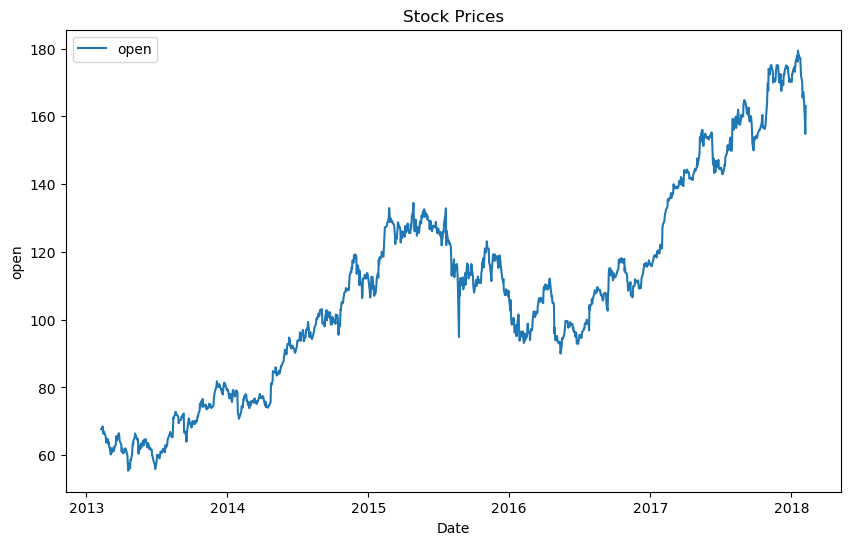

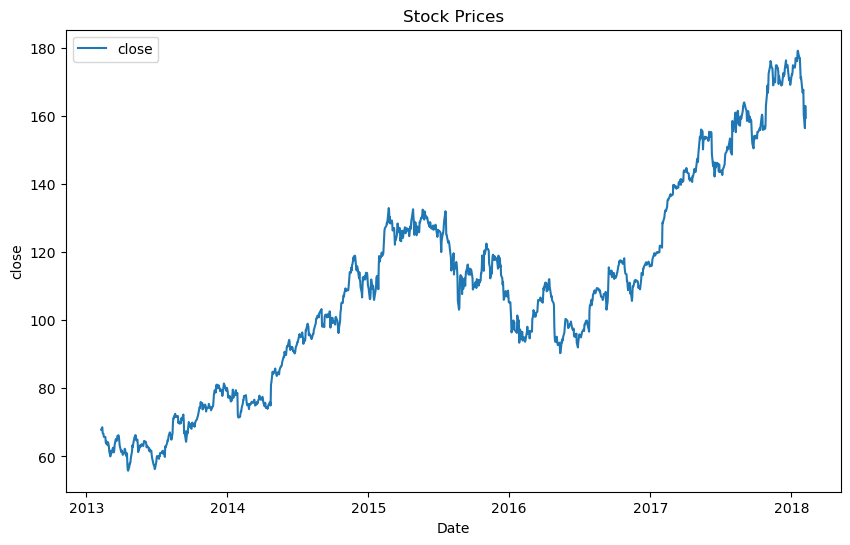

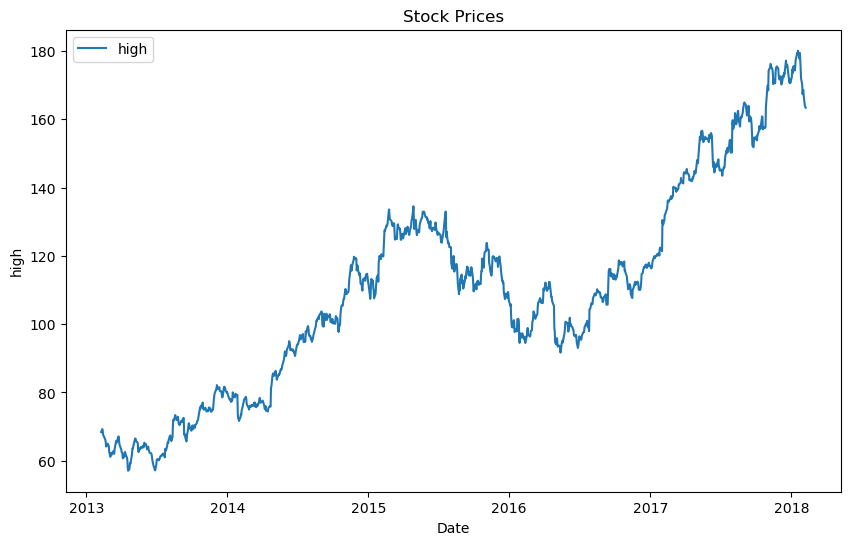

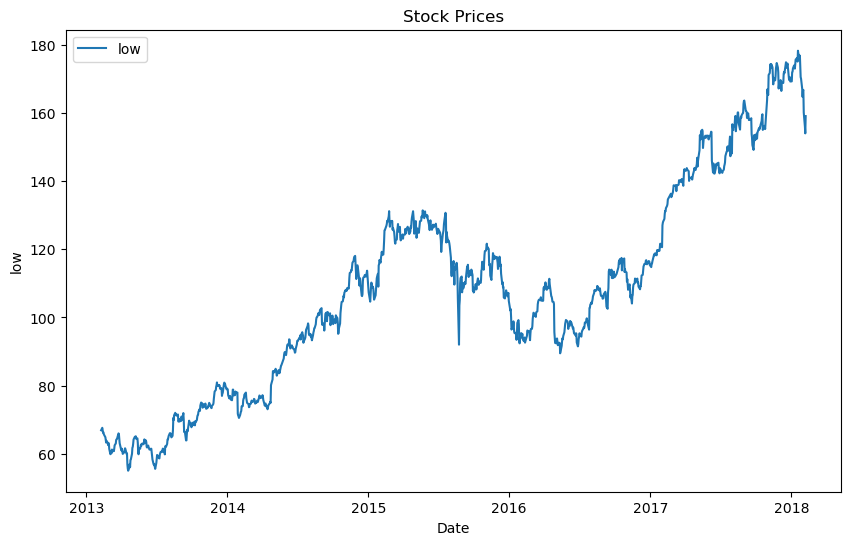

In [5]:
vars = ['open', 'close', 'high', 'low']

def LinePlot(df, vars, title):
    for column in vars:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df[column], label=column)
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()
LinePlot(df, vars, 'Stock Prices')

### Clean Data (if needed)

In [6]:
df.isnull().sum()
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

### Compute 200 MA

In [7]:
days = 200

df['close'].rolling(window=days).mean().tail(days)
aapl_new = df.copy()
print(aapl_new)

           date      open      high       low     close     volume  Name
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...         ...       ...       ...       ...       ...        ...   ...
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]


In [8]:
days = 200
aapl_new['close_' + str(days)] = aapl_new['close'].rolling(window=days).mean()
print(aapl_new['close_' + str(days)])


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1254    159.41200
1255    159.51110
1256    159.58135
1257    159.68515
1258    159.76465
Name: close_200, Length: 1259, dtype: float64


### LSTM an RNN architecture

In [9]:
aapl_new = aapl_new.dropna()
aapl_new.isnull().sum()

date         0
open         0
high         0
low          0
close        0
volume       0
Name         0
close_200    0
dtype: int64

In [10]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(aapl_new[['close', 'close_200']])

In [11]:
def create_sequences(df_scaled, days):
    sequences = []
    targets = []

    for i in range(len(df_scaled) - days):
        seq = df_scaled[i:i+days]
        target = df_scaled[i+days]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

x, y = create_sequences(df_scaled, days)

In [12]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(x.shape[1], x.shape[2])))
model.add(Dense(units=2))  # Output layer with 2 neurons for Close and 200_MA
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=50, batch_size=32)


Epoch 1/50
27/27 [==============================] - 2s 32ms/step - loss: 0.1620
Epoch 2/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0060
Epoch 3/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0047
Epoch 4/50
27/27 [==============================] - 1s 32ms/step - loss: 0.0039
Epoch 5/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0029
Epoch 6/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 7/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 8/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0010
Epoch 9/50
27/27 [==============================] - 1s 33ms/step - loss: 9.8061e-04
Epoch 10/50
27/27 [==============================] - 1s 32ms/step - loss: 9.8718e-04
Epoch 11/50
27/27 [==============================] - 1s 34ms/step - loss: 8.9601e-04
Epoch 12/50
27/27 [==============================] - 1s 35ms/step - loss: 8.5176e-04
Epoch 13/50
27/27 [==

In [13]:
# Use the last day in the data to make predictions
last_day = x[-1].reshape(1, days, 2)
predicted_values = model.predict(last_day)

# Inverse transform the predicted values to get the original scale
predicted_values = scaler.inverse_transform(np.concatenate([last_day[0], predicted_values], axis=0))[-1]


1/1 [==============================] - 0s 164ms/step


In [14]:
# Assuming your data is stored in df_scaled
last_day = df_scaled[-days:].reshape(1, days, 2)


In [15]:
forecasted_values = []

for _ in range(200):
    prediction = model.predict(last_day)
    forecasted_values.append(prediction[0])

    # Update last_day for the next iteration
    last_day = np.concatenate([last_day[:, 1:, :], prediction.reshape(1, 1, 2)], axis=1)


1/1 [==============================] - 0s 21ms/step


In [16]:
last_date = pd.to_datetime(df.index[-1])
forecasted_dates = pd.date_range(start=(last_date + pd.Timedelta(days=1)), periods=200, freq='B')


TypeError: list indices must be integers or slices, not tuple

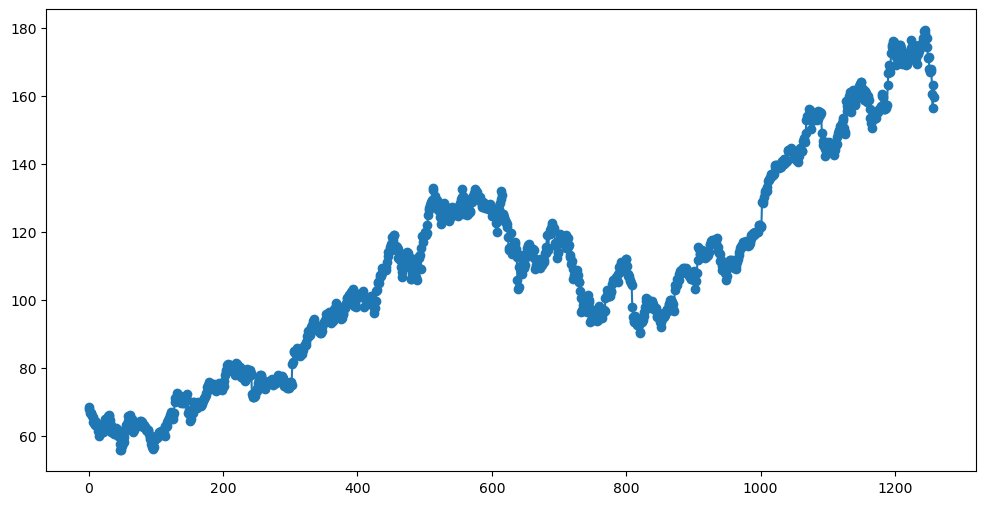

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Original Closing Prices', marker='o')
plt.plot(forecasted_dates, forecasted_values[:, 0], label='Forecasted Closing Prices', marker='o', linestyle='dashed', color='red')
plt.title('RNN Forecast of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()